In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
im = cv2.imread('pelak/1/1 (1).jpg')

In [3]:
cv2.imshow('photo',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
im = cv2.imread('pelak/2/2 (1).jpg')

In [5]:
files = os.listdir('pelak/1')

In [6]:
im2 = cv2.resize(im,(8,32))

In [7]:
im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)

In [8]:
im3.shape

(32, 8)

In [9]:
im4 = im3.flatten()

In [10]:
im5 = im4.reshape(32,8)

In [11]:
files = os.listdir('pelak/1')
x = np.empty((0,256))
y = np.array([])
for filename in files:
    im = cv2.imread('pelak/1/' + filename)
    im2 = cv2.resize(im,(8,32))
    im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)
    im4 = im3.flatten()
    x = np.append(x,[im4], axis=0)
    y = np.append(y,1)

In [12]:
files = os.listdir('pelak/2')

for filename in files:
    im = cv2.imread('pelak/2/' + filename)
    im2 = cv2.resize(im,(8,32))
    im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)
    im4 = im3.flatten()
    x = np.append(x,[im4], axis=0)
    y = np.append(y,2)

In [13]:
y[700]

2.0

In [14]:
from sklearn  import linear_model
from sklearn.model_selection import train_test_split

In [15]:
X_train ,X_test ,y_train , y_test =train_test_split(x ,y ,test_size = 0.2)


In [16]:
model = linear_model.LogisticRegression()

In [17]:

model.fit(X_train,y_train)

C:\Users\p\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
out = model.predict(X_test)

In [19]:
x1 = np.empty((0,256))
im = cv2.imread('pelak/1/1 (154).jpg' )
im2 = cv2.resize(im,(8,32))
im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)
im4 = im3.flatten()
x1 = np.append(x1,[im4], axis=0)


In [20]:
natije = model.predict(x1)

In [21]:
natije

array([1.])

In [22]:
img_plak = cv2.imread('pelak.png')

In [23]:
img_plak0 = cv2.imread('pelak.png',0)

In [24]:
cv2.imshow('photo',img_plak0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
s =90 - (np.sum(img_plak0 , axis=0,keepdims=True)/255)

In [ ]:
print(s[0])


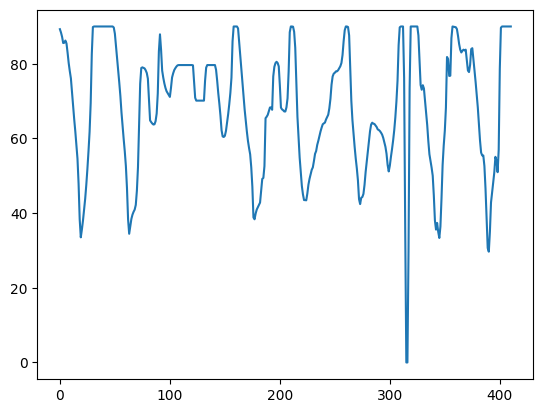

In [38]:
plt.close()
plt.plot(s[0])
plt.show()

In [36]:
pelak = img_plak.copy()

pelak = cv2.line(pelak, (158,0),(158,90),(0,0,200),2)
cv2.imshow('ax',pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [33]:
pelak = img_plak.copy()
xi = 0
for i in s[0]:
    xi = xi+1
    if i<5:
        pelak= cv2.line(pelak, (xi,0),(xi,90),(0,0,255),1)
          


cv2.imshow('ax',pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()   

In [69]:
pelak = img_pelak0.copy()

#بین جاهایی که در داخل عکس پلاک سفید هست خط میکشیم
pelak = cv2.line(pelak,(160,0),(160,90),(0,0,200),1)

cv2.imshow('ax',pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
img_pelak = cv2.imread('pelak.png')
ret,img_pelak = cv2.threshold(img_pelak,127,255,cv2.THRESH_BINARY)

pelak = img_pelak0.copy()
xi = 0
xi1 = 0
xi2 = 0


flag1 = False
flag2 = False


for i in s[0]:
    xi += 1

    if i > 9 and flag1==True and flag2 == False:
        
        flag2 = True
    if i < 5:
        cv2.line(pelak,(xi,0),(xi,90),(0,0,0),1)
        
        if flag1 == False:
            xi1 = xi
        
        if flag2 == True:
            xi2 = xi
            flag2 = False
            flag1 = False
            img1 = img_pelak[:,xi1:xi2]
            
            x1 = np.empty((0,192))
            im2 = cv2.resize(img1,(8,24))
            im3 = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
            im4 = im3.flatten()
            x1 = np.append(x1,[im4],axis=0)
            natije = model.predict(x1)
            print(natije)
            
            
            cv2.imshow('ax',img1)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            xi1 = xi2

        flag1 = True

In [67]:
cv2.imshow('ax',img_pelak0)
cv2.waitKey(0)
cv2.destroyAllWindows()